In [1]:
import numpy as np

import matplotlib.pyplot as plt

# 1. 방정식의 근 구하기

## 1) Bisection methods

In [2]:
## Bisection Methods
def bisection(f, a, b, n):
    from numpy import zeros, sign
    c = zeros(n)
    for i in range(n):
        c[i] = (a + b) / 2.0
        if sign(f(c[i])) * sign(f(a)) > 0:
            a = c[i]
        else:
            b = c[i]
    return c

In [3]:
## Define function
def f(x):
    return -x**2 + 6.0 * x - 5.0
    

xb = bisection(f, -2.0, 3.0, 15)
xb

array([0.5       , 1.75      , 1.125     , 0.8125    , 0.96875   ,
       1.046875  , 1.0078125 , 0.98828125, 0.99804688, 1.00292969,
       1.00048828, 0.99926758, 0.99987793, 1.00018311, 1.00003052])

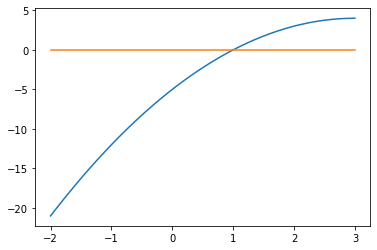

In [4]:
x = np.linspace(-2, 3, 40)
h = np.linspace(0, 0, 40)
plt.plot(x, f(x))
plt.plot(x, h)
plt.show()

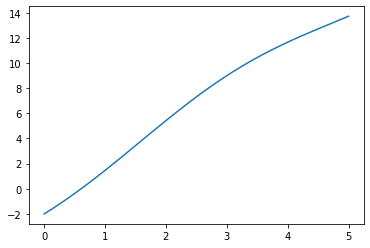

array([2.5       , 1.25      , 0.625     , 0.3125    , 0.46875   ,
       0.546875  , 0.5859375 , 0.60546875, 0.61523438, 0.61035156,
       0.60791016, 0.60668945, 0.6072998 , 0.60699463, 0.60714722])

In [5]:
## practice1

def f1(x):
    return 3*x - np.cos(x) - 1

x = np.linspace(0, 5, 40)
plt.plot(x, f1(x))
plt.show()

bisection(f1, 0, 5, 15)


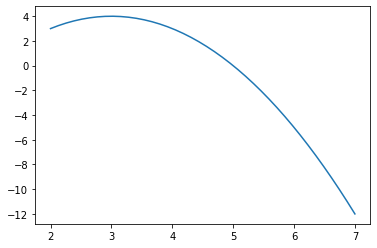

array([4.5       , 5.75      , 5.125     , 4.8125    , 4.96875   ,
       5.046875  , 5.0078125 , 4.98828125, 4.99804688, 5.00292969,
       5.00048828, 4.99926758, 4.99987793, 5.00018311, 5.00003052])

In [6]:
## practice2

def f2(x):
    return -x**2 + 6*x - 5 

x = np.linspace(2, 7, 40)
plt.plot(x, f2(x))
plt.show()

bisection(f2, 2, 7, 15)

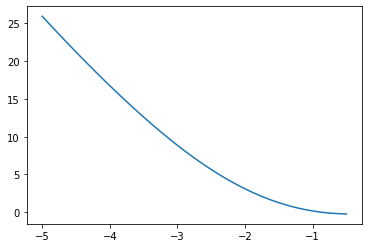

array([-2.75      , -1.625     , -1.0625    , -0.78125   , -0.921875  ,
       -0.8515625 , -0.88671875, -0.86914062, -0.87792969, -0.87353516,
       -0.87573242, -0.87683105, -0.87628174, -0.8765564 , -0.87669373])

In [7]:
## practice3

def f3(x):
    return x**2 + np.sin(x) 

x = np.linspace(-5, -.5, 40)
plt.plot(x, f3(x))
plt.show()

bisection(f3, -5, -.5, 15)

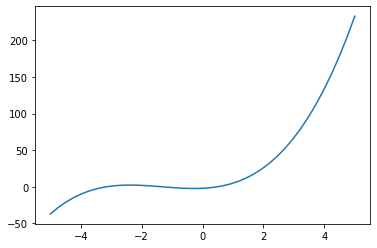

array([0.        , 2.5       , 1.25      , 0.625     , 0.3125    ,
       0.46875   , 0.546875  , 0.5078125 , 0.48828125, 0.47851562,
       0.48339844, 0.48095703, 0.48217773, 0.48156738, 0.48126221])

In [8]:
## practice4

def f4(x):
    return x**3 + 4 * x**2 + 2 * x -2 

x = np.linspace(-5, 5, 40)
plt.plot(x, f4(x))
plt.show()

bisection(f4, -5, 5, 15)

## 2) fixed point methods

$f(x) = 0$ 의 해를 구하자.



$f(x) = 0$ 를 정리하여 $x = g(x)$ 꼴로 나타낸다. 

그리고 반복계산하여 $x$ 값을 업데이트한다.

$$x^{(k+1)} = g(x^{(k)}),~k = 0, 1, 2, \dots$$

In [9]:
## fixed point methods
 
def fixedpoint(g, x0, n):
    from numpy import zeros
    x = zeros(n)
    errs = zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = g(x[i])
    return x

In [10]:
## Define functions

def g(x):
    return 1.0/6.0*(x**2 + 5)

xf = fixedpoint(g, 3.0, 15)
xf

array([3.        , 2.33333333, 1.74074074, 1.33836305, 1.13186928,
       1.04685468, 1.01598412, 1.00537062, 1.00179501, 1.00059888,
       1.00019968, 1.00006657, 1.00002219, 1.0000074 , 1.00000247])

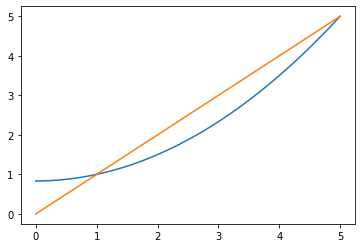

In [11]:
x = np.linspace(0, 5, 40)
plt.plot(x, g(x))
plt.plot(x, x)
plt.show()

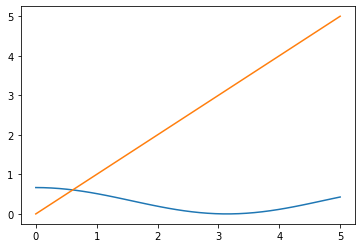

array([0.        , 0.66666667, 0.59529575, 0.60932756, 0.60667768,
       0.60718225, 0.60708632, 0.60710456, 0.60710109, 0.60710175,
       0.60710163, 0.60710165, 0.60710165, 0.60710165, 0.60710165])

In [12]:
## practice1

def g1(x):
    return 1/3 * (np.cos(x) + 1)

x = np.linspace(0, 5, 40)
plt.plot(x, g1(x))
plt.plot(x, x)
plt.show()

fixedpoint(g1, 0, 15)

## 3) Newton-Raphson method

$f(x) = 0$ 을 근을 찾자. Taylor theorem에 의해

$$f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x^*-a)^2,~~\exists~x^* \in (a, x)\lor(x, a) $$

따라서 $f(x) = 0$ 에서 다음 식이 성립한다.
$$x-a = -\frac{f(a)}{f'(a)} -\frac{1}{f'(a)}\frac{f''(a)}{2!}(x^*-a)^2 \implies x = a -\frac{f(a)}{f'(a)} -\frac{1}{f'(a)}\frac{f''(a)}{2!}(x^*-a)^2 $$

이러한 성질을 이용하여 $a$ 가 방정식의 근 $x$로 수렴하는 알고리즘을 만들 수 있다.


$k$ 번째 반복에서 오차 한계값이 $\frac{1}{f'(x^{(k)})}\frac{f''(x^{(k)})}{2!}(x-x^{(k)})^2$ 이라면

$$x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}$$

Talyor 급수에서 근사 생략하는 항은 다음과 같은 빅오로 나타낼 수 있다.
$$\frac{f''(a)}{2!}(x^*-a)^2 = O((x-a)^2)$$

In [13]:
## Newton-Raphson method

def newton(f, df, x0, n):
    from numpy import zeros
    x = zeros(n)
    x[0] = x0
    for k in range(n-1):
        x[k+1] = x[k] - f(x[k])/df(x[k])
    return x

In [14]:
def f(x):
    return -x**2 + 6.0 * x - 5.0

def df(x):
    return -2.0*x + 6.0    

newton(f, df, -2.0, 7)

array([-2.        ,  0.1       ,  0.86034483,  0.99544236,  0.99999482,
        1.        ,  1.        ])

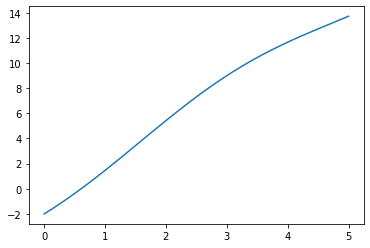

array([0.        , 0.66666667, 0.60749285, 0.60710167, 0.60710165,
       0.60710165, 0.60710165, 0.60710165, 0.60710165, 0.60710165,
       0.60710165, 0.60710165, 0.60710165, 0.60710165, 0.60710165])

In [15]:
## practice

def f1(x):
    return 3* x - np.cos(x) - 1

def df1(x):
    return 3 + np.sin(x)

x = np.linspace(0, 5, 40)
plt.plot(x, f1(x))
plt.show()


newton(f1, df1, 0.0, 15)

## 4) Relaxtion methods

In [16]:
## Relaxtion methods

def newton_rex(f, df, x0, n, omega):
    from numpy import zeros
    x = zeros(n)
    x[0] = x0
    for k in range(n-1):
        x[k+1] = x[k] - omega * f(x[k])/df(x[k])
    return x

In [17]:
def f(x):
    return 1.0 - x * np.exp(1-x)

def df(x):
    return -np.exp(1-x) + x * np.exp(1-x)

## the same result as newton-raphson will be provided
newton_rex(f, df, -2.0, 15, 1)

array([-2.        , -1.31673764, -0.70582153, -0.18557681,  0.22869132,
        0.53170387,  0.73320933,  0.8554926 ,  0.92438809,  0.96125893,
        0.98038172,  0.99012703,  0.99504731,  0.99751957,  0.99875876])

In [18]:
newton_rex(f, df, -2.0, 15, 1.75)

array([-2.        , -0.80429088,  0.1354376 ,  0.7139348 ,  0.94198757,
        0.99178093,  0.99895295,  0.9998688 ,  0.99998359,  0.99999795,
        0.99999974,  0.99999997,  0.99999999,  1.00000002,  1.        ])

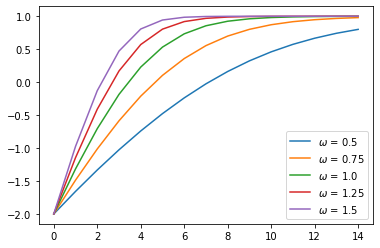

In [19]:
for omega in [0.5 + i*0.25 for i in range(0, 5)]:
    plt.plot(newton_rex(f, df, -2.0, 15, omega), label = "$\omega$ = {}".format(omega))   
plt.legend()
plt.show()

## 5) Non-linear equations

$f_1(x_1, x_2) = 0, ~ f_2(x_1, x_2) = 0$ 으로 구성된 비선형 연립방정식을 해석해보자.

근과 $x_1^{(k)},~x_2^{(k)}$의 차를 각각 $h, q$ 라고 한다면

$$f_1(x_1, x_2) = f_1(x_1^{(k)}, x_2^{(k)}) + h \frac{\partial f_1 (x_1^{(k)}, x_2^{(k)})}{\partial x_1} + q \frac{\partial f_1 (x_1^{(k)}, x_2^{(k)})}{\partial x_2} + \dots = 0$$


$O(h^2), O(h^2), O(hq)$ 이상을 무시하면

$$ h \frac{\partial f_1 (x_1^{(k)}, x_2^{(k)})}{\partial x_1} + q \frac{\partial f_1 (x_1^{(k)}, x_2^{(k)})}{\partial x_2} = -f_1(x_1^{(k)}, x_2^{(k)})$$

행렬로 표시하면

$$\begin{bmatrix} \frac{\partial f_1 (x_1^{(k)}, x_2^{(k)})}{\partial x_1} & \frac{\partial f_1 (x_1^{(k)}, x_2^{(k)})}{\partial x_2} \\ 
\frac{\partial f_2 (x_1^{(k)}, x_2^{(k)})}{\partial x_1} & \frac{\partial f_2 (x_1^{(k)}, x_2^{(k)})}{\partial x_2}
\end{bmatrix} \begin{pmatrix} h \\ q \end{pmatrix} = - \begin{pmatrix} f_1(x_1^{(k)}, x_2^{(k)}) \\ f_2(x_1^{(k)}, x_2^{(k)}) \end{pmatrix}$$

아래를 다음과 같은 항으로 표시 할 수 있다.
$$\mathbf{J} = \begin{bmatrix} \frac{\partial f_1 (x_1^{(k)}, x_2^{(k)})}{\partial x_1} & \frac{\partial f_1 (x_1^{(k)}, x_2^{(k)})}{\partial x_2} \\ 
\frac{\partial f_2 (x_1^{(k)}, x_2^{(k)})}{\partial x_1} & \frac{\partial f_2 (x_1^{(k)}, x_2^{(k)})}{\partial x_2}
\end{bmatrix}, ~\Delta \mathrm{x} = \begin{pmatrix} h \\ q \end{pmatrix},~\mathrm{f} = \begin{pmatrix}  f_1(x_1^{(k)}, x_2^{(k)}) \\ f_2(x_1^{(k)}, x_2^{(k)}) \end{pmatrix}$$

$$\mathbf{J} \Delta \mathrm{x} = -\mathrm{f}$$

$$\Delta \mathrm{x} = -\mathbf{J}^{-1} \mathrm{f}$$

따라서 아래와 같은 반복 모형이 가능하다.

$$\begin{pmatrix} x_1^{(k+1)} - x_1^{(k)} \\ x_2^{(k+1)} - x_2^{(k)} \end{pmatrix} = -\mathbf{J}^{-1} \mathrm{f}$$


In [20]:
## Non-linear equations

def newton_nonlinear(f1, f2, j, x10, x20, n, omega):
    from numpy import array, dot, zeros, set_printoptions
    from numpy.linalg import inv
    x1 = zeros(n)
    x2 = zeros(n)
    x1[0] = x10
    x2[0] = x20
    for k in range(n-1):
        f = array([f1(x1[k], x2[k]), f2(x1[k], x2[k])])
        dx1, dx2 = -omega * dot(inv(j(x1[k], x2[k])), f)
        x1[k+1] = x1[k] + dx1
        x2[k+1] = x2[k] + dx2
    return x1, x2

In [21]:
## Jacobian matrix of (f1, f2)^t
def jacobian(x1, x2):
    j11 = 2.0 * x1
    j12 = 2.0 * x2
    j21 = 1.0
    j22 = -1.0
    return np.array([[j11, j12], [j21, j22]])
    
def f1(x1, x2):
    return x1**2 + x2**2 - 1.0

def f2(x1, x2):
    return x1 - x2 - 1.0

In [22]:
x1, x2 = newton_nonlinear(f1, f2, jacobian, -3.0, -3.0, 15, 1.5)

print("x1 = ", x1)
print("x2 = ", x2)

x1 =  [-3.00000000e+00 -1.25000000e-01 -1.11607143e-01  3.14445446e-02
 -2.26010614e-02  9.69572094e-03 -5.26189607e-03  2.52911747e-03
 -1.29022098e-03  6.38720809e-04 -3.20961040e-04  1.60080764e-04
 -8.01403714e-05  4.00451947e-05 -2.00288459e-05]
x2 =  [-3.         -1.625      -0.86160714 -1.09355546 -0.96010106 -1.02155428
 -0.9896369  -1.00528338 -0.99738397 -1.0013144  -0.9993444  -1.0003282
 -0.999836   -1.00008203 -0.99995899]


## 6) Secant methods

Newton-Raphson 방법은 함수의 도함수를 제공해야하는 단점이 있다.

하지만 도함수의 정의에 따라 함수의 도함수를 다음과 같이 생각할 수 있다.

$$f'(x) = \frac{f(x - h) - f(x)}{h},~h = x - x^{(k)}$$

이러한 근사식을 앞서 언급했던 다음 식과 결합하여 반복과정을 나타낸다.

이때 도함수의 근사값은 이전 반복 계산값을 활용한다.

$$x^{(k+1)} =  x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}$$

$$ \approx  x^{(k)} - f(x^{(k)})\frac{x^{(k)} - x^{(k-1)}}{f(x^{(k)}) - f(x^{(k-1)}) } $$

In [25]:
def secant(f, x0, x1, n):
    from numpy import zeros
    xs = zeros(n)
    for k in range(n):
        x2 = x1 - f(x1) * ((x1 - x0) / (f(x1) - f(x0)))
        x0 = x1
        x1 = x2
        xs[k] = x2
    return xs   

In [26]:
def f(x):
    return -x**2 + 6.0*x - 5.0

secant(f, -2.0, 3.0, 7)

array([ 2.2       , -2.        ,  1.62068966,  1.29189189,  0.94131852,
        1.00454728,  1.00006582])

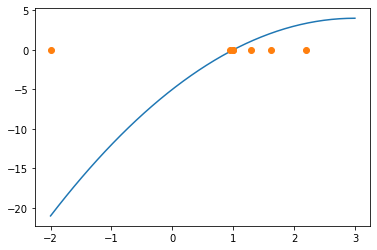

In [39]:
x = np.linspace(-2.0, 3.0, 40)
plt.plot(x, f(x))
h = np.linspace(0, 0, 7)
plt.plot(secant(f, -2.0, 3.0, 7),  h, "o")
plt.show()

In [43]:
h = np.linspace(0, 0, 7)

secant(f, -2.0, 3.0, 7)

array([ 2.2       , -2.        ,  1.62068966,  1.29189189,  0.94131852,
        1.00454728,  1.00006582])

In [70]:
## practice

def f1(x):
    from numpy import sqrt
    return sqrt(x+1) - 2*x + 1


array([ 1.22474487,  1.16342427,  1.10190982,  1.04020859,  0.97832719,
        0.91627189,  0.85404857,  0.79166281,  0.72911987,  0.66642475,
        0.60358218,  0.54059664,  0.47747242,  0.41421356,  0.35082394,
        0.28730723,  0.22366695,  0.15990646,  0.09602897,  0.03203753,
       -0.03206492, -0.09627556, -0.16059171, -0.22501078, -0.28953028,
       -0.35414784, -0.41886117, -0.48366806, -0.5485664 , -0.61355415,
       -0.67862934, -0.74379008, -0.80903453, -0.87436095, -0.93976762,
       -1.00525291, -1.07081522, -1.13645302, -1.20216482, -1.26794919])

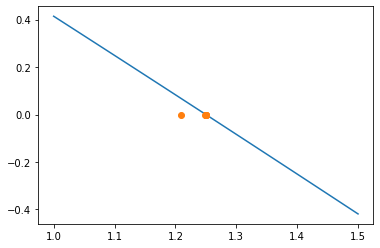

array([1.20883229, 1.24809506, 1.25000176, 1.25      , 1.25      ,
       1.25      ])

In [75]:
x = np.linspace(1, 1.5, 40)

plt.plot(x, f1(x))
h = np.linspace(0, 0, 6)
plt.plot(secant(f1, 0.5, 5, 6), h, "o")
plt.show()

secant(f1, 0.5, 5, 6)